In [1]:
# importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder

In [5]:
from google.colab import drive
drive.mount('/content/drive')
data=pd.read_csv("/content/drive/MyDrive/Study/CS5542 - Big data/ICP/ICP-7/data.csv")
data.head(15)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
5,6,Female,22,17,76
6,7,Female,35,18,6
7,8,Female,23,18,94
8,9,Male,64,19,3
9,10,Female,30,19,72


In [6]:
data = data.drop(columns=['CustomerID'])
data.describe()

,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000
mean,38.850000,60.560000,50.200000
std,13.969007,26.264721,25.823522
min,18.000000,15.000000,1.000000
25%,28.750000,41.500000,34.750000
50%,36.000000,61.500000,50.000000
75%,49.000000,78.000000,73.000000
max,70.000000,137.000000,99.000000


In [22]:
# encode categorical data
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(data['Gender'])
data['Gender'] = y

data.head(10)

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40
5,0,22,17,76
6,0,35,18,6
7,0,23,18,94
8,1,64,19,3
9,0,30,19,72


In [23]:
# standardizing the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

# statistics of scaled data
data_s=pd.DataFrame(data_scaled).describe()
data_s

,0,1,2,3
count,2.000000e+02,2.000000e+02,2.000000e+02,2.000000e+02
mean,1.554312e-17,-9.603429e-17,-6.128431e-16,-1.121325e-16
std,1.002509e+00,1.002509e+00,1.002509e+00,1.002509e+00
min,-8.864053e-01,-1.496335e+00,-1.738999e+00,-1.910021e+00
25%,-8.864053e-01,-7.248436e-01,-7.275093e-01,-5.997931e-01
50%,-8.864053e-01,-2.045351e-01,3.587926e-02,-7.764312e-03
75%,1.128152e+00,7.284319e-01,6.656748e-01,8.851316e-01
max,1.128152e+00,2.235532e+00,2.917671e+00,1.894492e+00


In [24]:
# defining the kmeans function with initialization as k-means++
kmeans = KMeans(n_clusters=2, init='k-means++')

# fitting the k means algorithm on scaled data
kmeans.fit(data_scaled)

KMeans(n_clusters=2)

In [25]:
# inertia on the fitted data
kmeans.inertia_

588.8026767824938

Text(0, 0.5, 'Inertia')

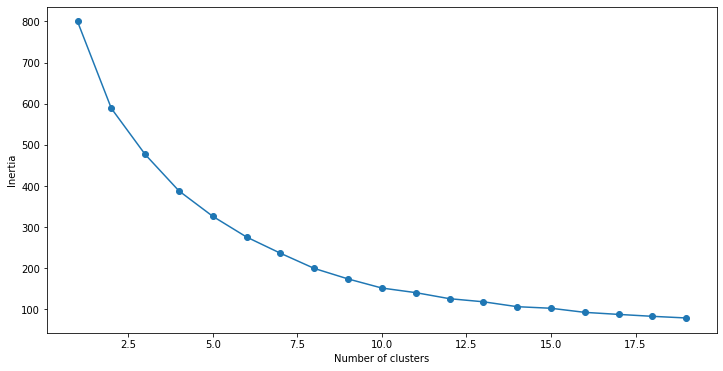

In [27]:
# fitting multiple k-means algorithms and storing the values in an empty list
SSE = []
for cluster in range(1,20):
    kmeans = KMeans(n_clusters = cluster, init='k-means++')
    kmeans.fit(data_scaled)
    SSE.append(kmeans.inertia_)

# converting the results into a dataframe and plotting them
frame = pd.DataFrame({'Cluster':range(1,20), 'SSE':SSE})
plt.figure(figsize=(12,6))
plt.plot(frame['Cluster'], frame['SSE'], marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')

In [28]:
# k means using 5 clusters and k-means++ initialization
kmeans = KMeans(n_clusters = 5, init='k-means++')
kmeans.fit(data_scaled)
pred = kmeans.predict(data_scaled)

In [ ]:
frame = pd.DataFrame(data_scaled)
frame['cluster'] = pred.astype(str)
frame['cluster'].value_counts()

2    56
1    46
3    41
4    29
0    28
Name: cluster, dtype: int64

In [29]:
frame

,Cluster,SSE
0,1,800.000000
1,2,588.802677
2,3,476.860069
3,4,388.181668
4,5,326.403265
5,6,276.020027
6,7,236.692879
7,8,199.784782
8,9,174.202999
9,10,152.086763


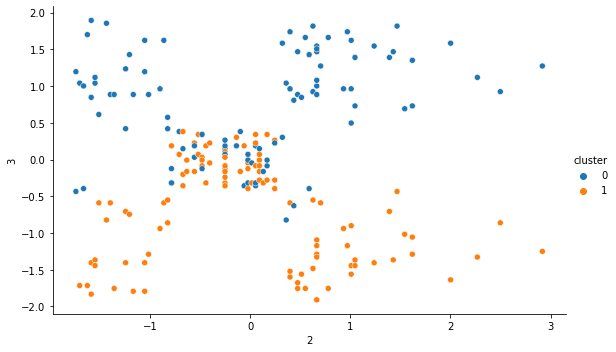

In [60]:
import seaborn as sb

sb.relplot(data=frame, x=frame[2], y=frame[3], hue='cluster', aspect=1.61)
plt.show()

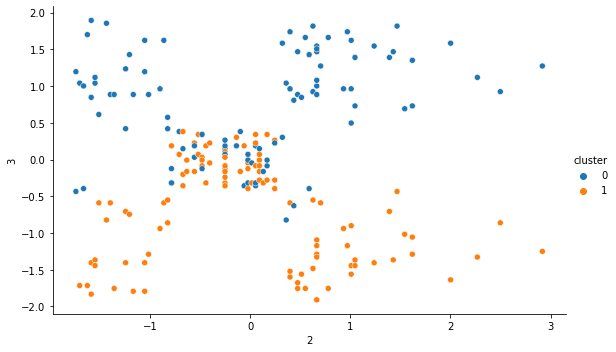

In [57]:
# k means using 2 clusters and k-means++ initialization
kmeans = KMeans(n_clusters = 2, init='k-means++')
kmeans.fit(data_scaled)
pred = kmeans.predict(data_scaled)

frame = pd.DataFrame(data_scaled)
frame['cluster'] = pred.astype(str)
frame['cluster'].value_counts()

sb.relplot(data=frame, x=frame[2], y=frame[3], hue='cluster', aspect=1.61)
plt.show()

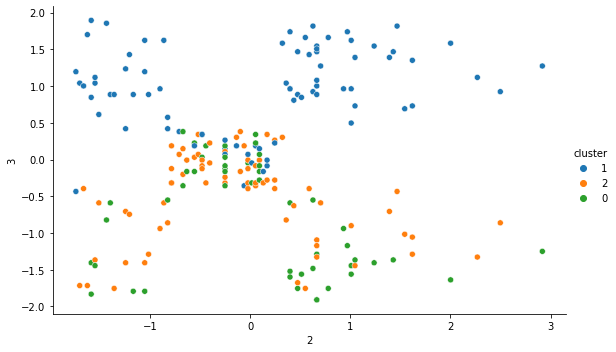

In [62]:
# k means using  3 clusters and k-means++ initialization
kmeans = KMeans(n_clusters = 3, init='k-means++')
kmeans.fit(data_scaled)
pred = kmeans.predict(data_scaled)

frame = pd.DataFrame(data_scaled)
frame['cluster'] = pred.astype(str)
frame['cluster'].value_counts()

sb.relplot(data=frame, x=frame[2], y=frame[3], hue='cluster', aspect=1.61)
plt.show()

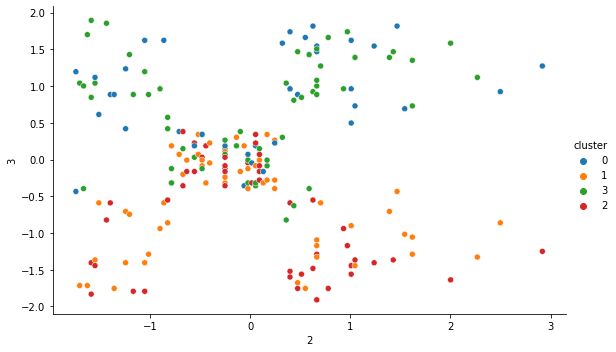

In [63]:
# k means using 4 clusters and k-means++ initialization
kmeans = KMeans(n_clusters = 4, init='k-means++')
kmeans.fit(data_scaled)
pred = kmeans.predict(data_scaled)

frame = pd.DataFrame(data_scaled)
frame['cluster'] = pred.astype(str)
frame['cluster'].value_counts()

sb.relplot(data=frame, x=frame[2], y=frame[3], hue='cluster', aspect=1.61)
plt.show()

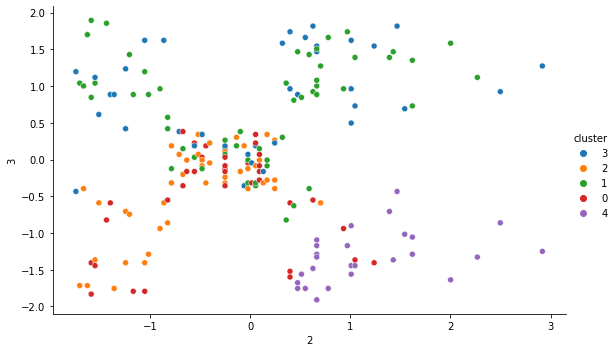

In [65]:
# k means using 4 clusters and k-means++ initialization
kmeans = KMeans(n_clusters = 5, init='k-means++')
kmeans.fit(data_scaled)
pred = kmeans.predict(data_scaled)

frame = pd.DataFrame(data_scaled)
frame['cluster'] = pred.astype(str)
frame['cluster'].value_counts()

sb.relplot(data=frame, x=frame[2], y=frame[3], hue='cluster', aspect=1.61)
plt.show()

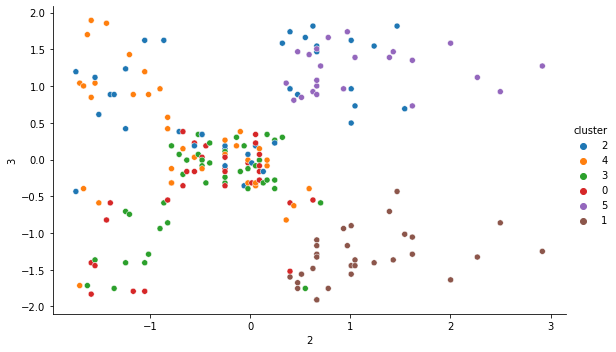

In [66]:
# k means using 6 clusters and k-means++ initialization
kmeans = KMeans( n_clusters = 6, init='k-means++')
kmeans.fit(data_scaled)
pred = kmeans.predict(data_scaled)

frame = pd.DataFrame(data_scaled)
frame['cluster'] = pred.astype(str)
frame['cluster'].value_counts()

sb.relplot(data=frame, x=frame[2], y=frame[3], hue='cluster', aspect=1.61)
plt.show()